# Multiple Linear Regression

y^ = b0 + b1X1 + b2X2 + ... + bnXn<br>
y^ - Dependent Variable<br>
b0 - y-intercept - Constant<br>
b1 - Slope Coefficient 1<br>
X1 - Independent Variable 1<br>
b2 - Slope Coefficient 2<br>
X2 - Independent Variable 2<br>
...<br>

### Anscombe's Quartet
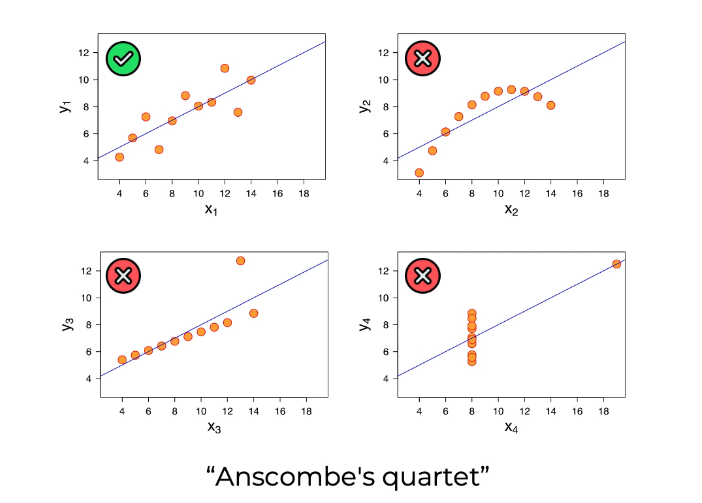
It illustrates that we can't just blindly apply linear regression<br>
Have to make sure that the data is fit for using linear regression.
<br><br>
### Assumptions of Linear Regression
1. Linearity <br>
Linear Relationship between Y and each X.
2. Homoscedasticity <br>
Equal Variance. No cone like shape, increasing or decreasing,<br>
which would mean variance is dependent on the independent variable, should not use a linear regression either
3. Multivariate Normality<br>
Normality of error distribution must be seen.
4. Independence<br>
Independence of observations. Includes 'No autocorrelation'.<br>
No pattern must be there within the data like. Some rows should not affect other rows. Ex - Stock Market
5. Lack of multicollinearity<br>
Predictors are not correlated with each other. <br>
That is, the independent variables/predictors should not be correlated with each other.<br>
If they are correlated, the coefficient estimates that we get in the model will be unreliable.
6. Outlier Check 
Outliers will affect the linear regression line that we get. Whether outliers must be removed depends on the business knowledge and the knowledge of the dataset.

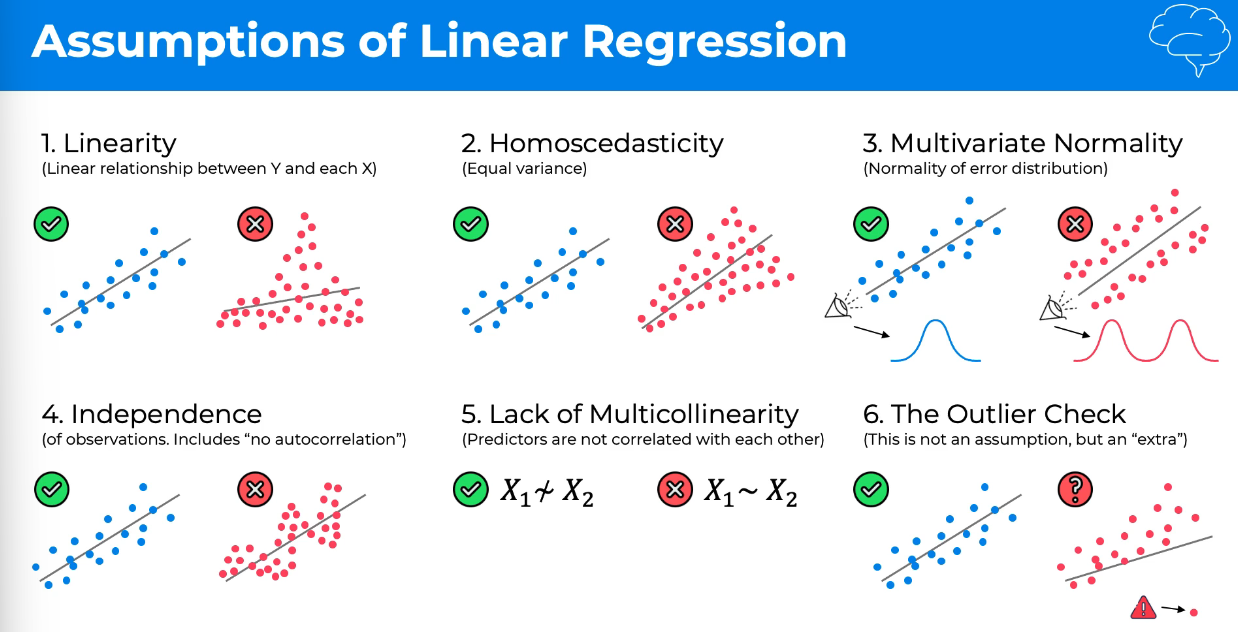

### Dummy variable trap 
Dummy variables are used when categorical features are present in the dataset. At that point we one hot encode and that creates these dummy variables.
The dummy variable trap occurs when one dummy variable can be predicted from others, leading to multicollinearity in regression models.<br><br>

#### Understanding the Issue<br>
Suppose you have a categorical variable like "Color" with three categories:<br>
Red, Blue, Green<br>
After applying one-hot encoding, you get three dummy variables:<br>
𝐷1 = 1 if Red, 0 otherwise<br>
𝐷2 = 1 if Blue, 0 otherwise<br>
𝐷3 = 1 if Green, 0 otherwise<br>
Now, notice that:<br>
D3 = 1 - (D1 + D2)<br>
This means one column is linearly dependent on the others, causing redundancy.<br><br>

#### How to Fix This?<br>
Solution: Drop one dummy variable to avoid the dependency.<br>
Instead of using all three dummy variables, keep only two:<br>
Keep D1 and D2 (Red and Blue)<br>
Exclude D3 (Green)<br>
Now, the model can infer the missing category:<br><br>

If 𝐷1 = 0 and D2 = 0, then it must be Green.<br><br>

#### Mathematical Impact<br>
Keeping all dummies leads to perfect multicollinearity, making matrix inversion impossible in regression.<br>
By dropping one dummy variable, you ensure the model works properly.<br>

D2 = 1 - D1<br>
So, exclude one dummy variable to avoid this.<br>

### Statistical Significance<br>
Are the results statistically significant? Are the insights statistically significant or not?<br>
ex - Coin toss<br>
H0 - Null Hypothesis - This is a fair coin<br>
H1 Ha - Alternate Hypothesis - This is not a fair coin<br>
So, initially assume the null hypothesis is true, based on the experiment we see whether we can contradict that.<br> 

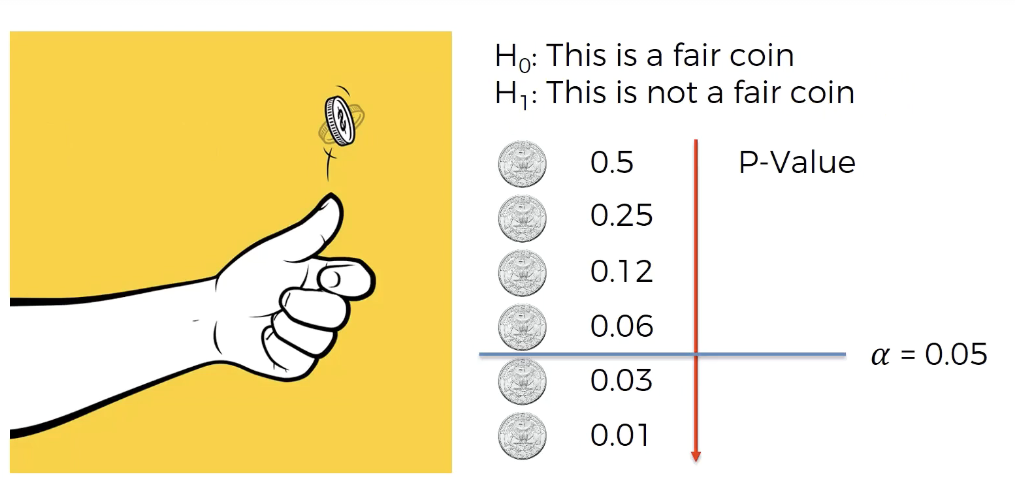

Alpha value is set usually at 0.05. Which means there is 95% confidence that the null hypothesis is wrong. More critical applications such as medical go for 99% confidence.<br>
The p-value helps us determine whether we should reject the null hypothesis (H0) or not.<br>
Compare with Alpha (Significance Level)<br>
Typical alpha level (α) = 0.05 (5% threshold).<br>
If p≤α, we reject H0(the coin is likely unfair).<br>
If p>α, we fail to reject H0(not enough evidence to claim bias).<br>

### Building a Model with multiple dependent variables
Have to discard some columns/dependent variables. Why?
1. Garbage in, Garbage out
2. Have to explain these behaviours. Not practical to explain thousands of variables.

#### 5 Methods of Building a Model
1. All-in
2. Backward Elimination 
3. Forward Elimination
4. Bidirectional Elimination
5. Score Comparison
(2,3,4) -> Stepwise Regression

##### 1. All-in 
Throw in all the variables.<br>
If you have prior knowledge and know the variables that are the true predictors.<br>
Or Domain Knowledge Or given the variables by someone or You have to use these variables<br>
Also if you are preparing for backward elimination<br>

##### 2. Backward Elimination
1. Select a significance level to stay in the model (ex - SL = 0.05)
2. Fit the full model with all possible predictors
3. Consider the predictor with the highest P-value<br>
   If P > SL, go to step 4<br>
   Else, go to FIN
4. Remove the predictor
5. Fit model without the variable.<br>
   Go back to Step 3
Finish - Model is ready<br>
(We have to fit the model every iteration because the variables are different, the constant is different...)<br>

##### 3. Forward Selection
1. Select a significance level to enter the model (ex - SL = 0.05)
2. Fit all simple regression models y ~ xn. Select the one with the lowest P-value
3. Keep this variable and fit all possible models with one extra predictor added to the ones already there
4. Consider the predictor wiht the lowest P-value.<br>
   If P<SL, go to Step 3<br>
   Else, go to FIN
Finish - Keep the previous model<br>

##### 4. Bidirectional Elimination
1. Select a significance level to enter and to stay in the model (ex - SLENTER = 0.05, SLSTAY = 0.05)
2. (Forward selection way) New variables must have P < SLENTER to enter
3. (Backward elimination way) Old variables must have P < SLSTAY to stay<br>
   Go to Step 2
4. No new variables can enter and no old variables can exit<br>
Finish - Model is ready<br>

##### 5. Score Comparison / All Possible Models
1. Select a criterion of goodness of fit
2. Construct All Possible Regression Models: 2^N - 1 total combinations
3. Select the one with the best criterion<br>
Finish - Model is ready<br>

When told stepwise regression, usually people refer to Bidirectional Elimination.<br>
Backward Elimination is the fastest of these methods. 

#### No need of Feature scaling
This is because for Multiple Linear Regression (Also Polynomial), the coefficients of theirs (b1, b2, b3, ...) will compensate.

#### Assumptions of Linear Regression
Should we check that? No, not needed. Because it will just give poor accuracy and you can use some other model. It is a waste of time spending it on checking the assumptions. 

##### Scikit-learn does the Backward Elimination. Scikit-learn or pandas function drop_first will drops one dummy variable to avoid dummy variable trap

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv('50_Startups.csv')
print(dataset)
# Independent Variable - R&D Spend, Administration, Marketing Spend, State
# Dependent Variable - Profit

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [11]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]   

## Encoding categorical data

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
np.set_printoptions(suppress=True)
X = np.array(ct.fit_transform(X))

In [13]:
print(X)

[[     0.        0.        1.   165349.2  136897.8  471784.1 ]
 [     1.        0.        0.   162597.7  151377.59 443898.53]
 [     0.        1.        0.   153441.51 101145.55 407934.54]
 [     0.        0.        1.   144372.41 118671.85 383199.62]
 [     0.        1.        0.   142107.34  91391.77 366168.42]
 [     0.        0.        1.   131876.9   99814.71 362861.36]
 [     1.        0.        0.   134615.46 147198.87 127716.82]
 [     0.        1.        0.   130298.13 145530.06 323876.68]
 [     0.        0.        1.   120542.52 148718.95 311613.29]
 [     1.        0.        0.   123334.88 108679.17 304981.62]
 [     0.        1.        0.   101913.08 110594.11 229160.95]
 [     1.        0.        0.   100671.96  91790.61 249744.55]
 [     0.        1.        0.    93863.75 127320.38 249839.44]
 [     1.        0.        0.    91992.39 135495.07 252664.93]
 [     0.        1.        0.   119943.24 156547.42 256512.92]
 [     0.        0.        1.   114523.61 122616.84 261

## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [15]:
from sklearn.linear_model import LinearRegression
#This takes care of the dummy variable trap on its own
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [23]:
y_pred = regressor.predict(X_test)  # Predicted values
y_test_array = y_test.values.reshape(len(y_test), 1)  # Convert to NumPy and reshape

# Now concatenate the arrays
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test_array), axis=1)

print(result)

print(X_test)
print(y_pred)

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
[[     0.        1.        0.    66051.52 182645.56 118148.2 ]
 [     1.        0.        0.   100671.96  91790.61 249744.55]
 [     0.        1.        0.   101913.08 110594.11 229160.95]
 [     0.        1.        0.    27892.92  84710.77 164470.71]
 [     0.        1.        0.   153441.51 101145.55 407934.54]
 [     0.        0.        1.    72107.6  127864.55 353183.81]
 [     0.        0.        1.    20229.59  65947.93 185265.1 ]
 [     0.        0.        1.    61136.38 152701.92  88218.23]
 [     0.        1.        0.    73994.56 122782.75 303319.26]
 [     0.        1.        0.   142107.34  91391.77 366168.42]]
[103015.2  132582.28 132447.74  71976.1  178537.48 116161.24  67851.69
  98791.73 113969.44 167921.07]


In [33]:
print(regressor.coef_)
print(regressor.intercept_)
print("\n")
print("Profit = ",end="")
for i in regressor.coef_:
    print(str(i)+"xX1 + ",end="")

[  86.64 -872.65  786.01    0.77    0.03    0.04]
42467.52924852117


Profit = 86.6383691861807xX1 + -872.6457908792424xX1 + 786.0074216941968xX1 + 0.7734671927325962xX1 + 0.0328845975362384xX1 + 0.03661002586409268xX1 + 

In [32]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))
#1 0 0 -> For California

[181566.92]
